In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

Text(0, 0.5, "in $1000's")

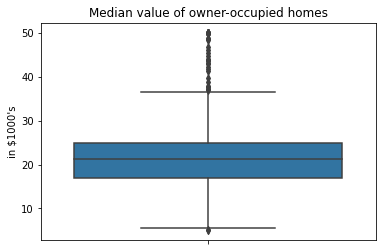

In [3]:
#For the "Median value of owner-occupied homes" provide a boxplot
box = sns.boxplot(y='MEDV', data=boston_df)
box.set_title("Median value of owner-occupied homes")
box.set_ylabel("in $1000's")

**Explanation:** The graph shows the values for the interquartile range and median.  Also, the dots over the top whisker suggest potential outliers for further exploration.

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '0: Tract does not bounds river. 1: Tract bounds river')

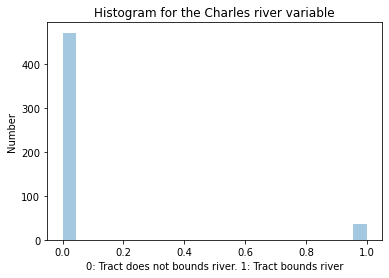

In [4]:
#Provide a  histogram for the Charles river variable
hist = sns.distplot(boston_df['CHAS'], kde = False)
hist.set_title("Histogram for the Charles river variable")
hist.set_ylabel("Number")
hist.set_xlabel("0: Tract does not bounds river. 1: Tract bounds river")

**Explanation:** 35 observations are "tract bounds river" and 471 are not. In other words, most of the data is not affected by the Charles River effect.

Text(0.5, 0, 'Age of owner in Years')

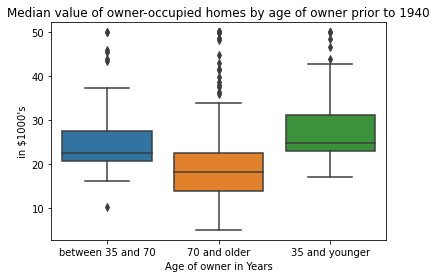

In [5]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

#For the "Median value of owner-occupied homes" provide a boxplot
box2 = sns.boxplot(y='MEDV', x='age_group', data=boston_df)
box2.set_title("Median value of owner-occupied homes by age of owner prior to 1940")
box2.set_ylabel("in $1000's")
box2.set_xlabel("Age of owner in Years")

**Explanation:** The value of owner-occupied homes is higher for those homes owned by younger owners (35 and yougher) and it is lower for older owners (70 and older).
There potential HIGH outliers that require furter exploration in all age groups and potentially low value-outliers in the "between 35 and 70" group.

Text(0, 0.5, 'Nitric oxide concentrations')

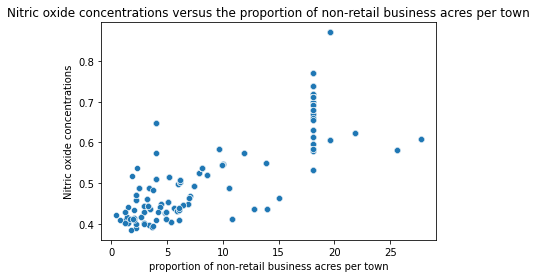

In [6]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
scatter = sns.scatterplot(y='NOX', x='INDUS', data=boston_df)
scatter.set_title("Nitric oxide concentrations versus the proportion of non-retail business acres per town")
scatter.set_xlabel("proportion of non-retail business acres per town")
scatter.set_ylabel("Nitric oxide concentrations")

**Explanation:** The graph suggests that there is a quite strong positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

In [7]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number')

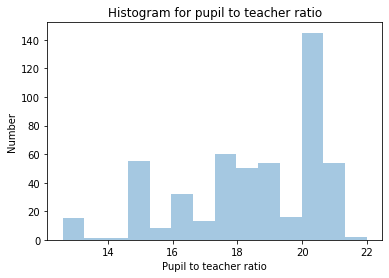

In [8]:
#Create a histogram for the pupil to teacher ratio variable
hist3 = sns.distplot(boston_df['PTRATIO'], kde = False)
hist3.set_title("Histogram for pupil to teacher ratio")
hist3.set_xlabel("Pupil to teacher ratio")
hist3.set_ylabel("Number")

**Explanation:** There is some dispersion in the pupil to teacher ratio variable, with a concentration of results afound 21 pupils by teacher.

# Tests and Regression Results

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

In [9]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is LESS than 0.05 we canNOT assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values based on being bounded by the Charles River.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


In [11]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'], center='mean')

# since the p-value is MORE than 0.05 we can assume equality of variance

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [12]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proprotion of non-retail business acres per town.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0: β1$ = 0 (additional weighted distance  to the five Boston employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (additional weighted distance  to the five Boston employment centres has an effect on the median value of owner occupied homes)

In [15]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.21e-08
Time:                        18:41:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value for the DIS-variable is less than 0.05, we will reject the null hypothesis as there is significant evidence that the median value of owner occupied homes is related wiht the additional weighted distance to the five Boston employment centres.